### **Detail Kuis**

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

In [4]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### **Check Imbalance Data**

Counter({1: 7877, 7: 7293, 3: 7141, 2: 6990, 9: 6958, 0: 6903, 6: 6876, 8: 6825, 4: 6824, 5: 6313})


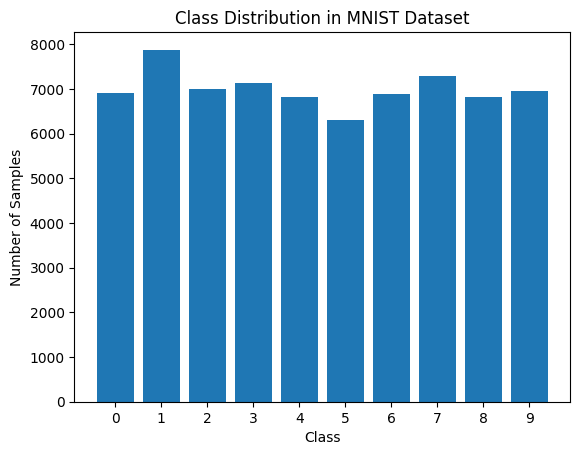

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Extract features and labels
x, y = mnist.data, mnist.target.astype(int)

# Count the Class Frequencies
class_counts = Counter(y)
print(class_counts)

# Convert class_counts to a list of counts for each class
counts = [class_counts[i] for i in range(10)]

# Define class labels
class_labels = [str(i) for i in range(10)]

# Create a bar chart
plt.bar(class_labels, counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MNIST Dataset')
plt.show()

In [8]:
# Calculate Class Imbalance Ratios
class_ratios = {class_label: count / len(y) for class_label, count in class_counts.items()}
# Print Class Distribution Statistics
print("Class Distribution in MNIST Dataset:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples ({class_ratios[class_label]*100:.2f}% of total)")

# Find the Imbalanced Classes (if any)
imbalanced_classes = [class_label for class_label, ratio in class_ratios.items() if ratio < 0.05]
if len(imbalanced_classes) > 0:
    print("Imbalanced Classes:", imbalanced_classes)
else:
    print("The dataset is approximately balanced.")

Class Distribution in MNIST Dataset:
Class 5: 6313 samples (9.02% of total)
Class 0: 6903 samples (9.86% of total)
Class 4: 6824 samples (9.75% of total)
Class 1: 7877 samples (11.25% of total)
Class 9: 6958 samples (9.94% of total)
Class 2: 6990 samples (9.99% of total)
Class 3: 7141 samples (10.20% of total)
Class 6: 6876 samples (9.82% of total)
Class 7: 7293 samples (10.42% of total)
Class 8: 6825 samples (9.75% of total)
The dataset is approximately balanced.


### **Print 15 First Images**

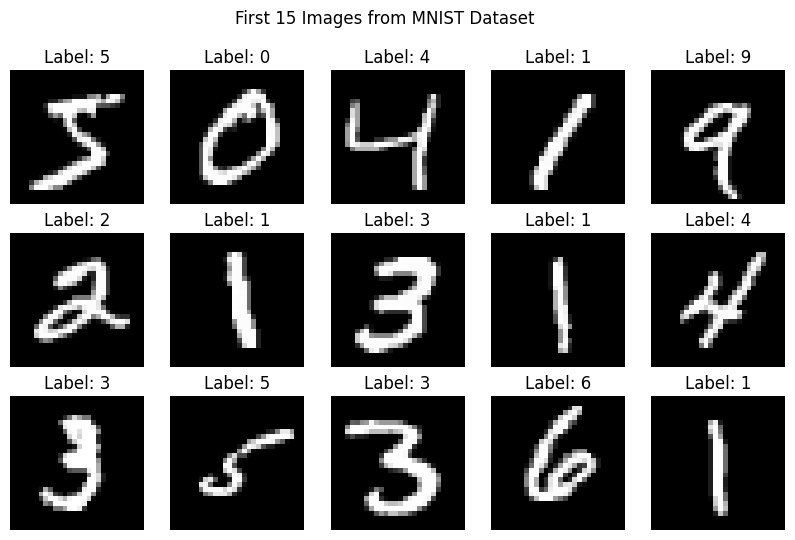

In [9]:
# Create a subplot with 3 rows and 5 columns to display the images

# Convert x to a NumPy array
x_convert = x.values.astype(int)

plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)  # 3 rows, 5 columns, and i+1-th subplot
    plt.imshow(x_convert[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')  # Turn off axis labels

plt.suptitle('First 15 Images from MNIST Dataset')
plt.show()

### **Print Image after Feature Extraction (HOG)**

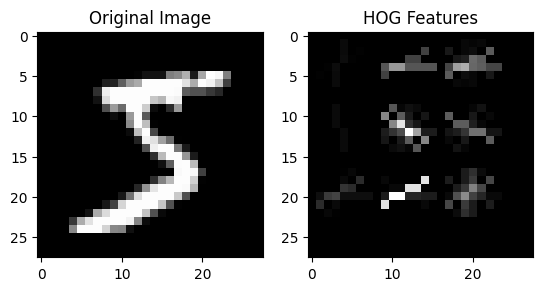

In [10]:
from skimage.feature import hog

# Extract HOG features from the chosen image
def display_extract_hog_features(image):
    # Reshape the image to its original shape (28x28)
    image = image.reshape((28, 28))
    # Calculate HOG features
    hog_feature, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return hog_feature, hog_image

# Extract HOG features and get the HOG image
hog_features, hog_image = display_extract_hog_features(x_convert[0])

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(x_convert[0].reshape(28, 28), cmap=plt.cm.gray) # type: ignore
plt.title('Original Image')

# Plot the HOG image
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap=plt.cm.gray) # type: ignore
plt.title('HOG Features')
plt.show()

### **SVM With HOG**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Extract HOG features from the images
def extract_hog_features(images):
    hog_features = []
    for image in images:
        # Reshape the image to its original shape (28x28)
        image = image.reshape((28, 28))
        # Calculate HOG features
        hog_feature = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
        hog_features.append(hog_feature)
    return np.array(hog_features)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_convert, y, test_size=0.2)
x_train_hog = extract_hog_features(x_train)
x_test_hog = extract_hog_features(x_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)

# Train the SVM classifier on the HOG features
svm_classifier.fit(x_train_hog, y_train)

# Make predictions on the training set
y_train_pred_rbf_hog = svm_classifier.predict(x_train_hog)

# Calculate the accuracy on the training set
accuracy_train_rbf_hog = accuracy_score(y_train, y_train_pred_rbf_hog)
print(f"Accuracy on Training Set SVM(rbf) HOG: {accuracy_train_rbf_hog*100:.2f}%")

# Make predictions on the test set
y_test_pred_rbf_hog = svm_classifier.predict(x_test_hog)

# Calculate the accuracy on the test set
accuracy_test_rbf_hog = accuracy_score(y_test, y_test_pred_rbf_hog)
print(f"Accuracy on Test Set SVM(rbf) HOG: {accuracy_test_rbf_hog*100:.2f}%")


Accuracy on Training Set SVM(rbf) HOG: 98.25%
Accuracy on Test Set SVM(rbf) HOG: 97.08%


In [12]:
# Classification Report for the Training Set & Test Set
from sklearn.metrics import classification_report

# Print the classification report on the training set
print("Classification Report on Training Set SVM RBF HOG:")
print(classification_report(y_train, y_train_pred_rbf_hog))

# Print the classification report on the test set
print("Classification Report on Test Set SVM RBF HOG:")
print(classification_report(y_test, y_test_pred_rbf_hog))

Classification Report on Training Set SVM RBF HOG:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5514
           1       0.99      0.99      0.99      6294
           2       0.98      0.98      0.98      5626
           3       0.98      0.97      0.98      5724
           4       0.98      0.98      0.98      5501
           5       0.99      0.99      0.99      5045
           6       0.99      0.99      0.99      5479
           7       0.98      0.97      0.98      5846
           8       0.97      0.98      0.97      5456
           9       0.97      0.97      0.97      5515

    accuracy                           0.98     56000
   macro avg       0.98      0.98      0.98     56000
weighted avg       0.98      0.98      0.98     56000

Classification Report on Test Set SVM RBF HOG:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1389
           1       0.99      0.98 

In [13]:
# Create a SVM classifier with linear kernel
svm_classifier_linear = SVC(kernel='linear', C=1.0)

# Train the SVM classifier on the HOG features
svm_classifier_linear.fit(x_train_hog, y_train)

# Make predictions on the training set
y_train_pred_linear = svm_classifier_linear.predict(x_train_hog)

# Calculate the accuracy on the training set
accuracy_train_linear_hog = accuracy_score(y_train, y_train_pred_linear)
print(f"Accuracy on Training Set SVM(linear) HOG: {accuracy_train_linear_hog*100:.2f}%")

# Make predictions on the test set
y_test_pred_linear_hog = svm_classifier_linear.predict(x_test_hog)

# Calculate the accuracy on the test set
accuracy_test_linear_hog = accuracy_score(y_test, y_test_pred_linear_hog)
print(f"Accuracy on Test Set SVM(linear) HOG: {accuracy_test_linear_hog*100:.2f}%")

Accuracy on Training Set SVM(linear) HOG: 96.14%
Accuracy on Test Set SVM(linear) HOG: 95.65%


In [14]:
# Classification Report for the Training Set & Test Set

# Print the classification report on the training set
print("Classification Report on Training Set SVM Linear HOG:")
print(classification_report(y_train, y_train_pred_linear))

# Print the classification report on the test set
print("Classification Report on Test Set SVM Linear HOG:")
print(classification_report(y_test, y_test_pred_linear_hog))

Classification Report on Training Set SVM Linear HOG:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5514
           1       0.98      0.99      0.99      6294
           2       0.96      0.96      0.96      5626
           3       0.95      0.95      0.95      5724
           4       0.95      0.96      0.96      5501
           5       0.97      0.97      0.97      5045
           6       0.97      0.98      0.98      5479
           7       0.95      0.94      0.94      5846
           8       0.94      0.95      0.94      5456
           9       0.95      0.94      0.94      5515

    accuracy                           0.96     56000
   macro avg       0.96      0.96      0.96     56000
weighted avg       0.96      0.96      0.96     56000

Classification Report on Test Set SVM Linear HOG:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1389
           1       0.98     

### **SVM With PCA**

In [15]:
# Data Preprocessing: Standardize the Data
from sklearn.preprocessing import StandardScaler

x_standardized = StandardScaler().fit_transform(x)

In [16]:
# PCA Using Scikit-Learn
from sklearn.decomposition import PCA

pca_100 = PCA(n_components=100)
# Fit the PCA model on the standardized dataset
x_pca_100 = pca_100.fit_transform(x_standardized)

# Print the shape of x_pca
print(x_pca_100.shape)

(70000, 100)


In [17]:
# Split data into training and test sets
x_train_pca_100, x_test_pca_100, y_train_pca_100, y_test_pca_100 = train_test_split(x_pca_100, y, test_size=0.2)

# Train an SVM classifier on the training set
svm_pca_classifier_rbf = SVC(kernel='rbf', C=1.0)

# Fit the SVM classifier on the training set
svm_pca_classifier_rbf.fit(x_train_pca_100, y_train_pca_100)

# Make predictions on the training set
y_train_pred_pca_100 = svm_pca_classifier_rbf.predict(x_train_pca_100)

# Calculate the accuracy on the training set
accuracy_train_pca_100 = accuracy_score(y_train_pca_100, y_train_pred_pca_100)
print(f"Accuracy on Training Set SVM(rbf) PCA(n_components=100): {accuracy_train_pca_100*100:.2f}%")

# Make predictions on the test set
y_test_pred_pca_100 = svm_pca_classifier_rbf.predict(x_test_pca_100)

# Calculate the accuracy on the test set
accuracy_test_pca_100 = accuracy_score(y_test_pca_100, y_test_pred_pca_100)
print(f"Accuracy on Test Set SVM(rbf) PCA(n_components=100): {accuracy_test_pca_100*100:.2f}%")

Accuracy on Training Set SVM(rbf) PCA(n_components=100): 98.31%
Accuracy on Test Set SVM(rbf) PCA(n_components=100): 97.17%


Confusion Matrix on Training Set SVM(rbf) PCA(n_components=100):


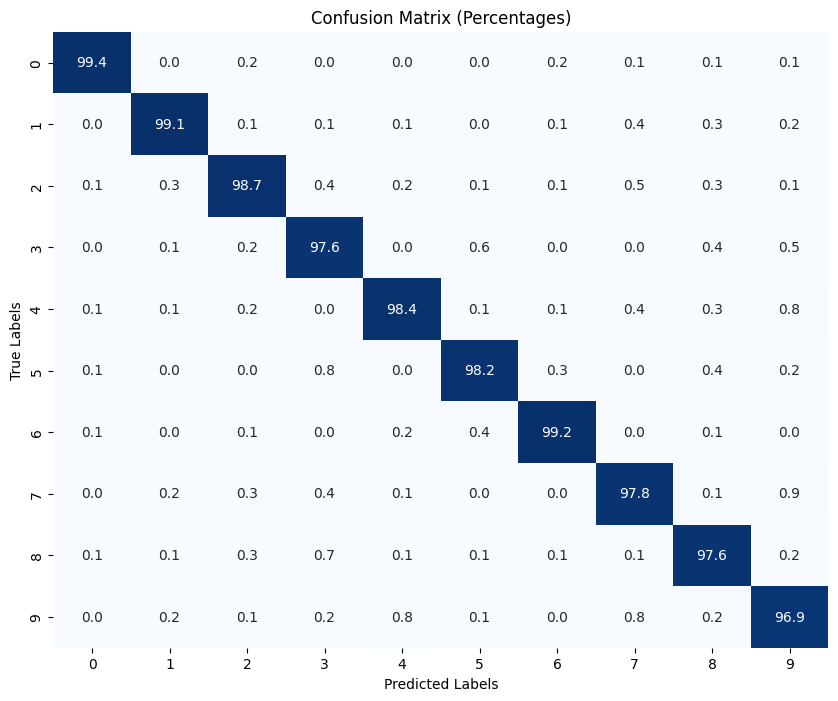

Confusion Matrix on Test Set SVM(rbf) PCA(n_components=100):


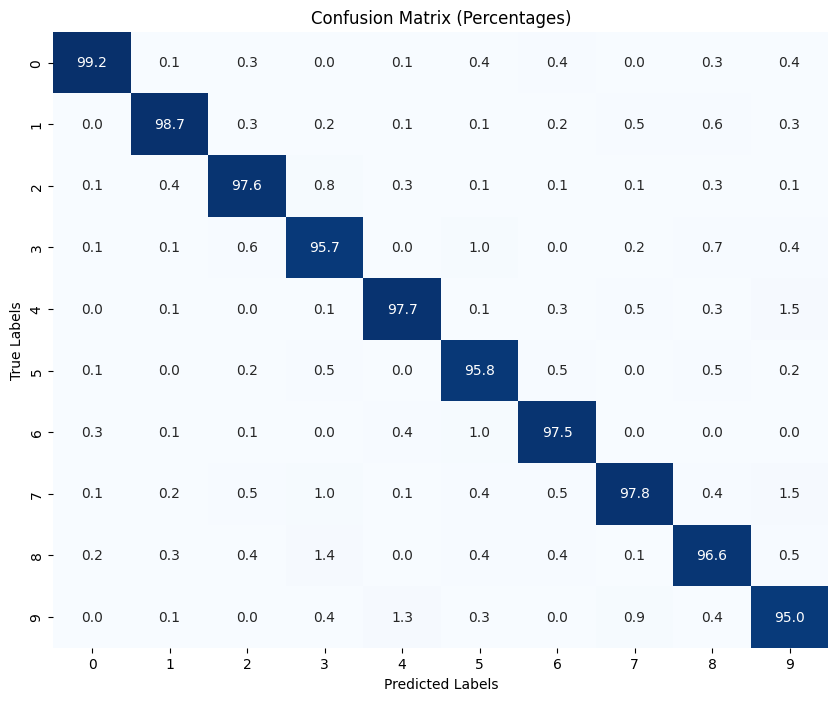

In [18]:
# Confusion Matrix for the Training Set & Test Set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Print the confusion matrix on the training set
print("Confusion Matrix on Training Set SVM(rbf) PCA(n_components=100):")
SVM_PCA_Matrix = confusion_matrix(y_train_pca_100, y_train_pred_pca_100)
percent_confusion_matrix = (SVM_PCA_Matrix / SVM_PCA_Matrix.sum(axis=1)).T * 100

plt.figure(figsize=(10, 8))
sns.heatmap(percent_confusion_matrix, annot=True, cmap='Blues', fmt='.1f', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()

# Print the confusion matrix on the test set
print("Confusion Matrix on Test Set SVM(rbf) PCA(n_components=100):")
SVM_PCA_Matrix = confusion_matrix(y_test_pca_100, y_test_pred_pca_100)
percent_confusion_matrix = (SVM_PCA_Matrix / SVM_PCA_Matrix.sum(axis=1)).T * 100

plt.figure(figsize=(10, 8))
sns.heatmap(percent_confusion_matrix, annot=True, cmap='Blues', fmt='.1f', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()

In [19]:
# PCA Using Scikit-Learn
from sklearn.decomposition import PCA

pca_200 = PCA(n_components=200)
# Fit the PCA model on the standardized dataset
x_pca_200 = pca_200.fit_transform(x_standardized)

# Print the shape of x_pca
print(x_pca_200.shape)

(70000, 200)


In [20]:
# Split data into training and test sets
x_train_pca_200, x_test_pca_200, y_train_pca_200, y_test_pca_200 = train_test_split(x_pca_200, y, test_size=0.3)

# Fit the SVM classifier on the training set
svm_pca_classifier_rbf.fit(x_train_pca_200, y_train_pca_200)

# Make predictions on the training set
y_train_pred_pca_200 = svm_pca_classifier_rbf.predict(x_train_pca_200)

# Calculate the accuracy on the training set
accuracy_train_pca_200 = accuracy_score(y_train_pca_200, y_train_pred_pca_200)
print(f"Accuracy on Training Set SVM(rbf) PCA(n_components=200): {accuracy_train_pca_200*100:.2f}%")

# Make predictions on the test set
y_test_pred_pca_200 = svm_pca_classifier_rbf.predict(x_test_pca_200)

# Calculate the accuracy on the test set
accuracy_test_pca_200 = accuracy_score(y_test_pca_200, y_test_pred_pca_200)
print(f"Accuracy on Test Set SVM(rbf) PCA(n_components=200): {accuracy_test_pca_200*100:.2f}%")

Accuracy on Training Set SVM(rbf) PCA(n_components=200): 98.42%
Accuracy on Test Set SVM(rbf) PCA(n_components=200): 96.70%


Confusion Matrix on Training Set SVM(rbf) PCA(n_components=200):


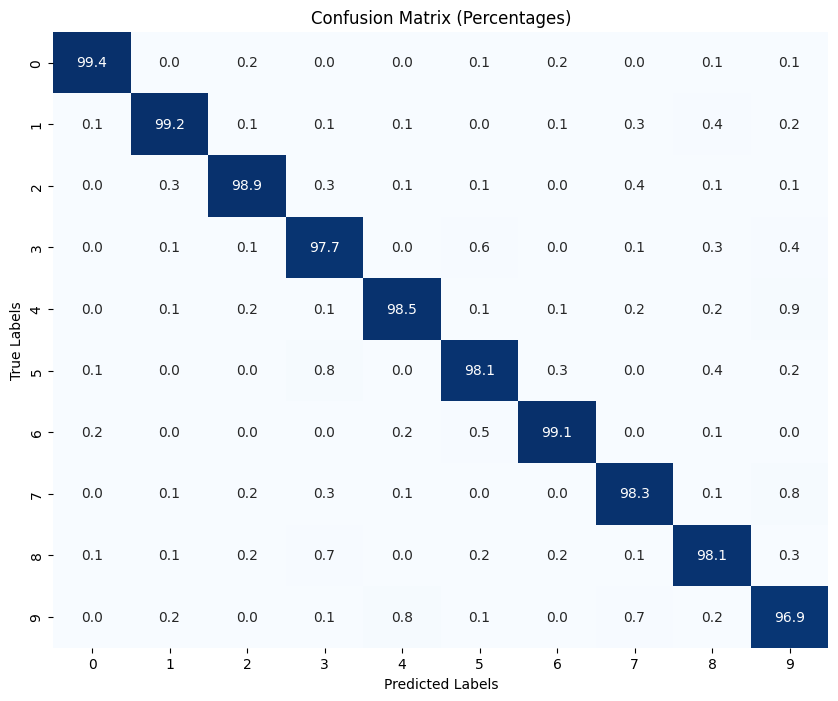

Confusion Matrix on Test Set SVM(rbf) PCA(n_components=200):


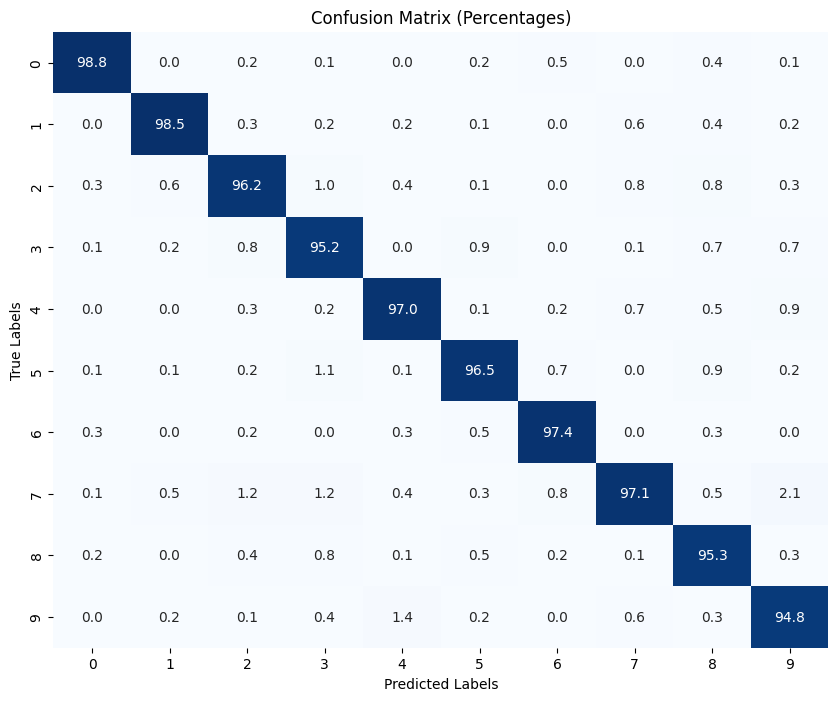

In [21]:
# Confusion Matrix for the Training Set & Test Set

# Print the confusion matrix on the training set
print("Confusion Matrix on Training Set SVM(rbf) PCA(n_components=200):")
SVM_PCA_Matrix = confusion_matrix(y_train_pca_200, y_train_pred_pca_200)
percent_confusion_matrix = (SVM_PCA_Matrix / SVM_PCA_Matrix.sum(axis=1)).T * 100

plt.figure(figsize=(10, 8))
sns.heatmap(percent_confusion_matrix, annot=True, cmap='Blues', fmt='.1f', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()

# Print the confusion matrix on the test set
print("Confusion Matrix on Test Set SVM(rbf) PCA(n_components=200):")
SVM_PCA_Matrix = confusion_matrix(y_test_pca_200, y_test_pred_pca_200)
percent_confusion_matrix = (SVM_PCA_Matrix / SVM_PCA_Matrix.sum(axis=1)).T * 100

plt.figure(figsize=(10, 8))
sns.heatmap(percent_confusion_matrix, annot=True, cmap='Blues', fmt='.1f', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()


### **Print Image Testing For SVM with RBF Kernel PCA(n_components=100)**

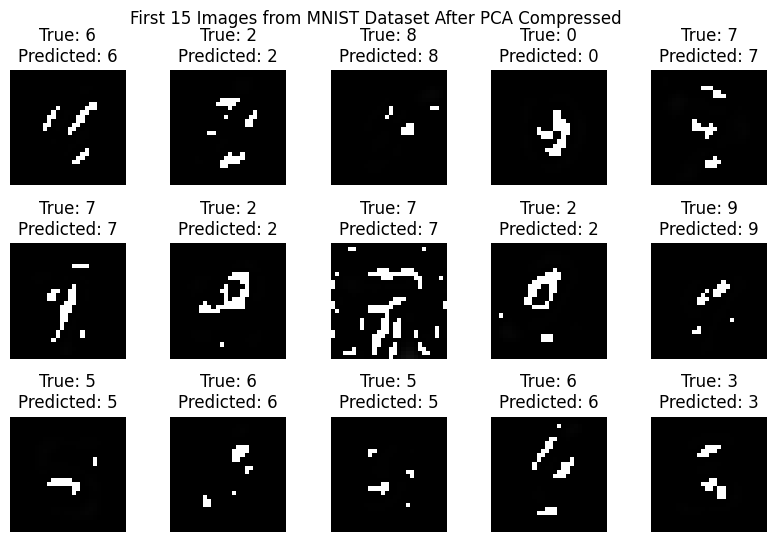

In [24]:
img_inverted = pca_100.inverse_transform(x_test_pca_100)
img_compressed = (np.dstack((img_inverted))).astype(np.uint8)
img_compressed = np.transpose(img_compressed, (2, 1, 0))
img_compressed = img_compressed.reshape(14000, 784)

plt.figure(figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    img_to_display = img_compressed[i].reshape(28, 28)
    true_label = y_test_pca_100.iloc[i]
    predicted_label = y_test_pred_pca_100[i]
    plt.imshow(img_to_display, cmap='gray')
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.suptitle('First 15 Images from MNIST Dataset After PCA Compressed')
plt.show()

### **Print Image Testing For SVM with RBF Kernel and HOG Features**

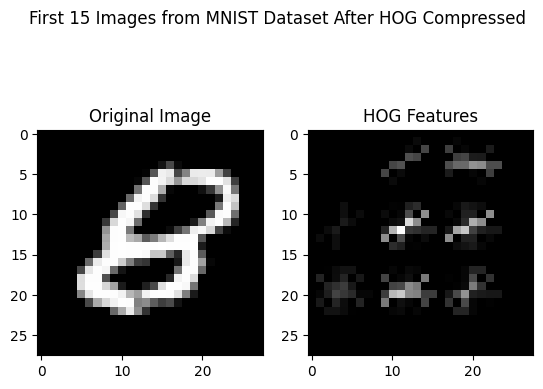

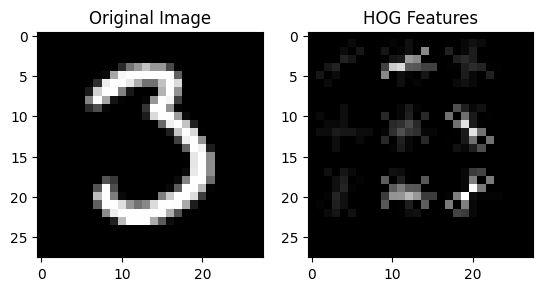

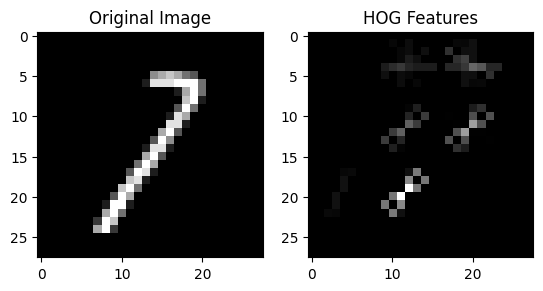

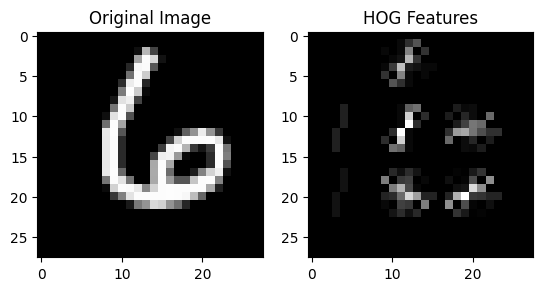

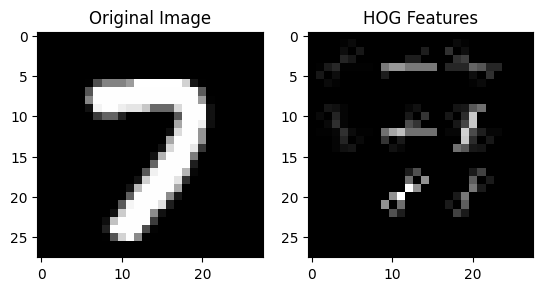

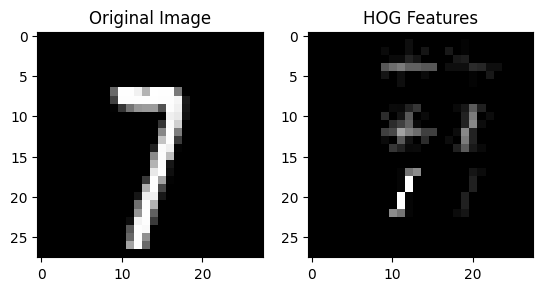

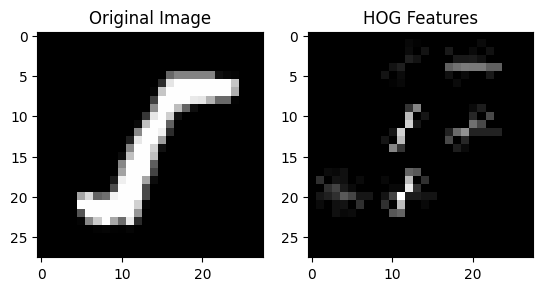

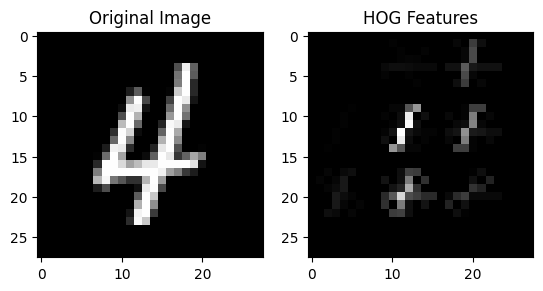

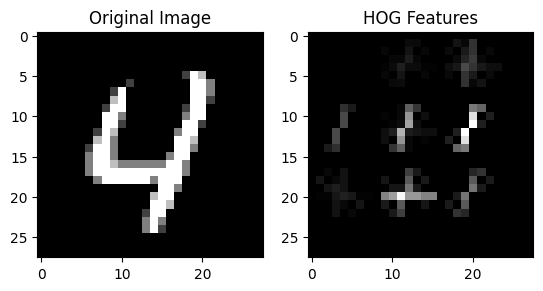

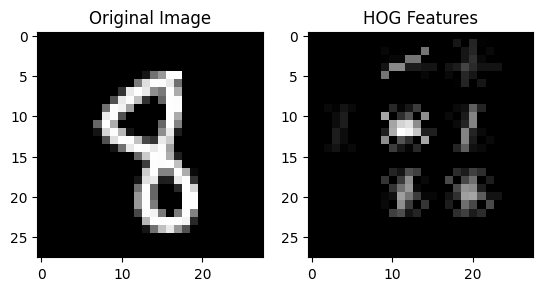

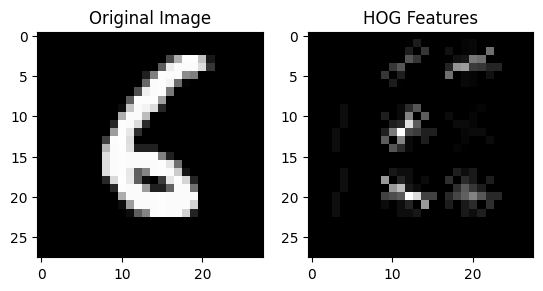

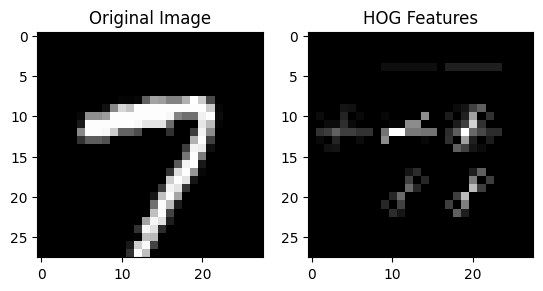

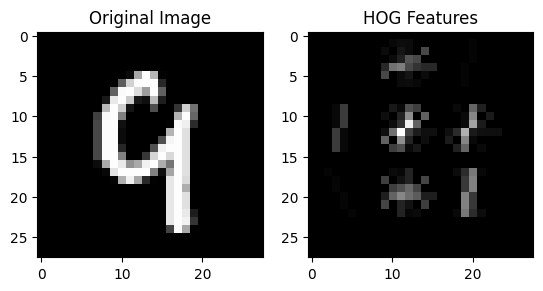

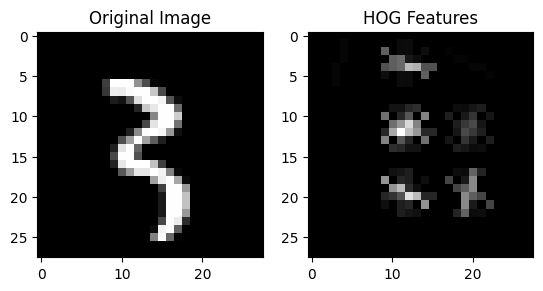

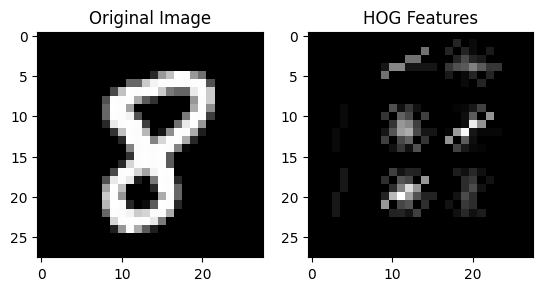

In [25]:
import matplotlib.pyplot as plt

plt.suptitle('First 15 Images from MNIST Dataset After HOG Compressed')
for i in range(15):
  # Extract HOG features and get the HOG image
  hog_features, hog_image = display_extract_hog_features(x_train[i])
  # Plot the original image
  plt.subplot(1, 2, 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.gray) # type: ignore
  plt.title('Original Image')
  # Plot the HOG image
  plt.subplot(1, 2, 2)
  plt.imshow(hog_image, cmap=plt.cm.gray) # type: ignore
  plt.title('HOG Features')
  plt.show()


### **Conclusion**

**1. SVM with RBF Kernel and PCA (n_components=200):**

  Training Accuracy: 98.42%

  Test Accuracy: 96.70%

  This model achieves high training accuracy but slightly lower test accuracy. It might indicate a bit of overfitting, as the training accuracy is significantly higher than the test accuracy. Reducing the overfitting could potentially improve the test accuracy.

**2. SVM with RBF Kernel and PCA (n_components=100):**

  Training Accuracy: 98.31%

  Test Accuracy: 97.17%
  
  This model also achieves high accuracy, both on the training and test sets. It performs slightly better on the test set compared to the model with 200 PCA components. It's a good trade-off between accuracy and dimensionality reduction.

**3. SVM with RBF Kernel and HOG Features:**

  Training Accuracy: 98.25%
  
  Test Accuracy: 97.08%
  
  This model, which uses Histogram of Oriented Gradients (HOG) features, performs exceptionally well. It achieves the highest test accuracy among the models you've tested, indicating that HOG features are highly informative for classifying MNIST digits. However, there is still a slight difference between training and test accuracy, suggesting a mild level of overfitting.

**4. SVM with Linear Kernel and HOG Features:**

  Training Accuracy: 96.14%
  
  Test Accuracy: 95.65%
  
  This model, using a linear kernel with HOG features, achieves good accuracy but is slightly outperformed by the RBF kernel with HOG features. It also shows a relatively smaller gap between training and test accuracy, which indicates less overfitting.

**In conclusion:**

Using HOG features with an SVM classifier, either with a linear or RBF kernel, yields the best test accuracy among the models tested. HOG features seem to be effective for digit classification.

PCA with 100 components also performs well, providing a good balance between accuracy and dimensionality reduction.

SVM with RBF kernel and PCA with 200 components shows slightly worse test accuracy compared to the other models and may have a tendency to overfit.